# Pymaceuticals Inc.
---

### Analysis

The dataset manipulated provides insight into the tumor volumes of 248 mice on different treatment regimens over time. The bar graphs depict the number of timepoints observed for mice on each regimen, thus we can infer that mice on capomulin and ramicane were most frequently measured. The dataset has a relatively equal split between male and female mice as well. After narrowing down to 4 treatment regimens for examination at the final measured timepoints, it can be inferred that the capomulin and ramicane regimens are most effective in reducing tumor volume compared with their counterparts, which may indicate why they were so closely observed. Further, the spread of volume datapoints for these regimens is tighter than those of infubinol and ceftamin, indicating that the results are more predicatble. The line graph for an individual mouse on capomulin indicates that the expected results are indeed being observed, since the tumor volume greatly diminishes over time. Finally, the average volume of tumors by weight for mice on capomulin was graphed in order to examine the relationship between tumor size and mouse size. These results are also expected, as the larger mice tend to have higher tumor volumes. The correlation coefficient for this graph is 0.84, indicating that the relationship is highly correlated.  
 

In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
result = study_results.merge(mouse_metadata, how="left", on="Mouse ID", sort=False)

# Display the data table for preview
result.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [273]:
# Checking the number of mice.
len(pd.unique(result['Mouse ID']))

249

In [274]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = result[result.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_ids = pd.unique(dups['Mouse ID'])
dup_ids

array(['g989'], dtype=object)

In [275]:
# Optional: Get all the data for the duplicate mouse ID. 
result[result["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [276]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
result_clean = result[result["Mouse ID"] != "g989"]
result_clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [277]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(result_clean['Mouse ID']))

248

## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

vol = result_clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"]
mean = vol.mean()
median = vol.median()
var = vol.var()
std = vol.std()
sem = vol.sem()
mean_df = pd.DataFrame({'Mean Tumor Volume': mean})
median_df = pd.DataFrame({'Median Tumor Volume': median})
var_df = pd.DataFrame({'Tumor Volume Variance': var})
std_df = pd.DataFrame({'Tumor Volume Std. Dev.': std})
sem_df = pd.DataFrame({'Mean Tumor Std. Err.': sem})

merge_1 = mean_df.merge(median_df, how="left", on="Drug Regimen", sort=False)
merge_2 = merge_1.merge(var_df, how="left", on="Drug Regimen", sort=False)
merge_3 = merge_2.merge(std_df, how="left", on="Drug Regimen", sort=False)
merge_4 = merge_3.merge(sem_df, how="left", on="Drug Regimen", sort=False)

merge_4


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Mean Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
vol.agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

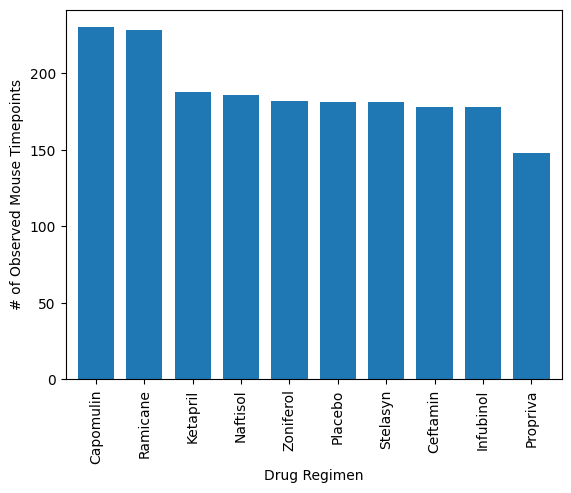

In [280]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_count = result_clean.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

timepoints_count.plot.bar(ylabel='# of Observed Mouse Timepoints',width=.75)

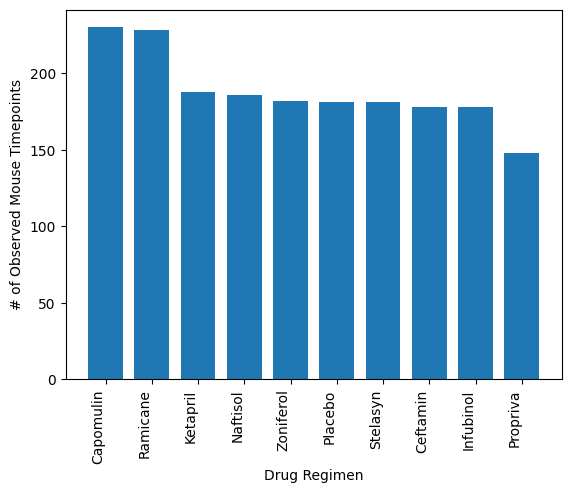

In [281]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_df = pd.DataFrame({'Drug Regimen': timepoints_count.index, 'Count': timepoints_count.values})

values = timepoints_df.values.tolist()
regimen = timepoints_df['Drug Regimen']
count = timepoints_df['Count']
plt.bar(regimen, count, width = 0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha='right')
plt.show()



<Axes: ylabel='Sex'>

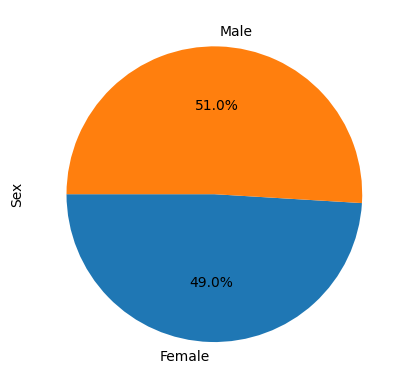

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = result_clean.groupby('Sex')['Mouse ID'].count()
gender.plot.pie(ylabel = "Sex", autopct = '%.1f%%',startangle=180)

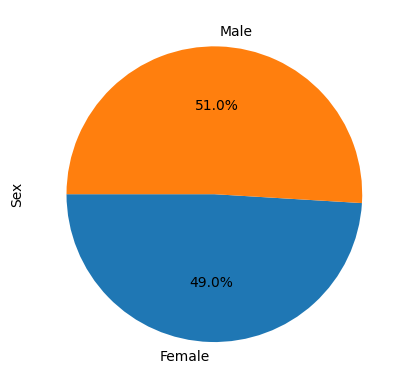

In [283]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame({'Gender': gender.index, 'Count': gender})


values_sex = gender_df.values.tolist()
genders = gender_df['Gender']
sex_count = gender_df['Count']
plt.pie(sex_count, labels= genders, autopct='%.1f%%', startangle = 180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [284]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
final = study_results.groupby(['Mouse ID'], as_index=False, sort=False).last()
final = final.drop('Timepoint', axis= 1)
final = final.drop('Metastatic Sites', axis= 1)
final = final.drop('Tumor Volume (mm3)', axis=1)
final
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_result = result_clean.merge(final, how="left", on="Mouse ID", sort=False)
capomulin = final_result.loc[final_result['Drug Regimen'] == 'Capomulin']
ramicane = final_result.loc[final_result['Drug Regimen'] == 'Ramicane']
infubinol = final_result.loc[final_result['Drug Regimen'] == 'Infubinol']
ceftamin = final_result.loc[final_result['Drug Regimen'] == 'Ceftamin']
final_four = pd.concat([capomulin, ramicane, infubinol, ceftamin])
final_four = final_four.groupby(['Mouse ID'], as_index=False, sort=False).last()
final_four

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,j246,35,38.753265,1,Capomulin,Female,21,21
2,r554,45,32.377357,3,Capomulin,Female,8,17
3,s185,45,23.343598,1,Capomulin,Female,3,17
4,b742,45,38.939633,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
95,p438,45,61.433892,1,Ceftamin,Female,11,26
96,b487,25,56.057749,1,Ceftamin,Female,6,28
97,o287,45,59.741901,4,Ceftamin,Male,2,28
98,q483,40,64.192341,1,Ceftamin,Male,6,26


In [285]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:



    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = final_four.loc[final_four["Drug Regimen"] == i, "Tumor Volume (mm3)"]


    # add subset
    tumor_list.append(tumor_data)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([.25, .75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3 - q1

    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    outliers = tumor_data.loc[(tumor_data < lower) | (tumor_data > upper)]
    print(f"{i}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 50    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


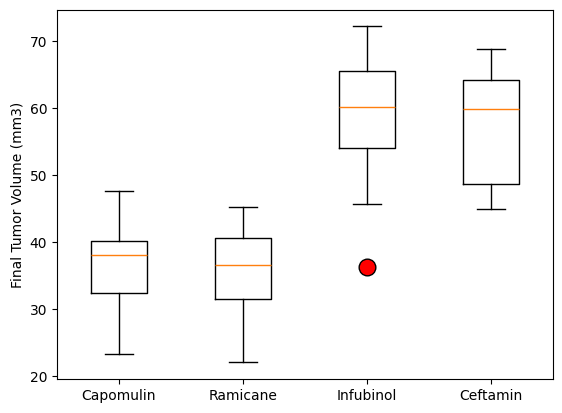

In [286]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker= 'o', markerfacecolor= 'r', markersize= 12)
plt.boxplot(tumor_list, labels=treatment_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

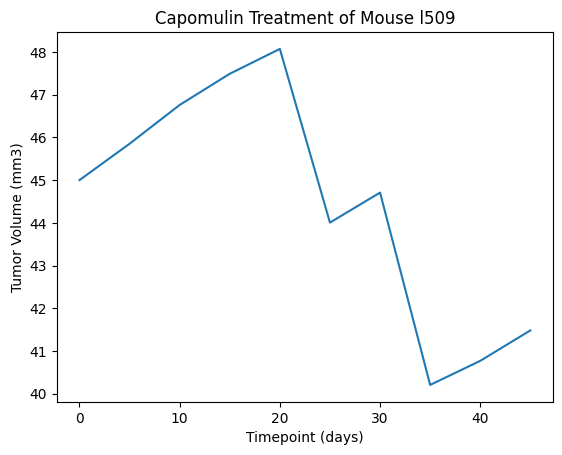

In [287]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = final_result.loc[final_result["Drug Regimen"]== "Capomulin"]
capomulin
mouse = capomulin.loc[capomulin["Mouse ID"]== "l509"]
mouse

time = mouse["Timepoint"]
vol = mouse["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(time, vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


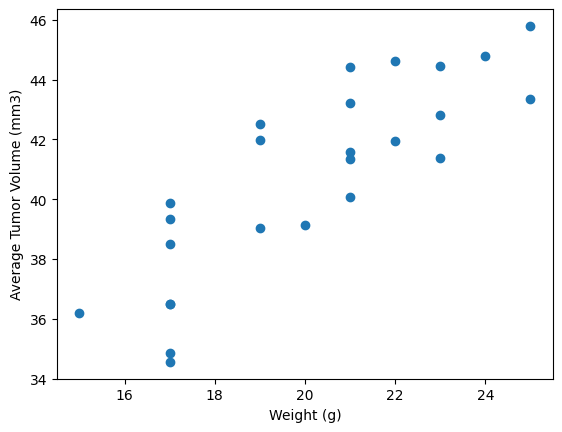

In [288]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


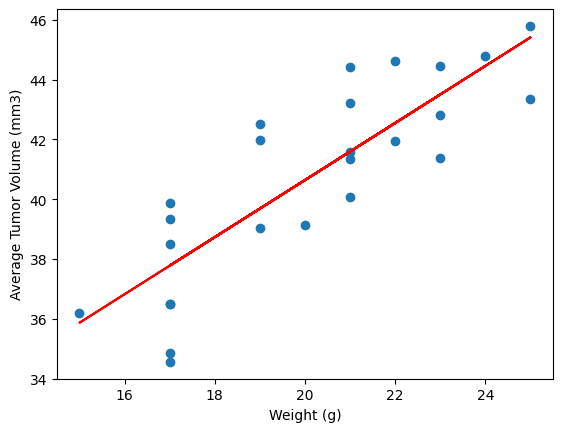

In [289]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

coefficient = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(coefficient[0], 2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()